In [6]:
%matplotlib inline
import seaborn as sns
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import math
from tsmom_model import *
from datetime import datetime
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [10]:
price = load_price()
pairs = pair_correlation(price,.99)
more , less = longer_list(pairs,price)
cleansed = price.copy()

tsmom_model.py:143: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:110: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  corr=df.resample(rule='m',how='last').corr()


ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool


tsmom_model.py:130: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt1 =df[x].resample(rule='m',how='last').count()
tsmom_model.py:131: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt2 =df[y].resample(rule='m',how='last').count()


In [11]:
chinese_markets=['SHFE-ZINC','SHFE-NATURAL RUBBER','SHFE-HOT ROLLED COIL',
                 'SHFE-GOLD','SHFE-COPPER','SHFE-BITUMEN','SHFE-SILVER',
                 'SHFE-ALUMINIUM','DCE-LLDPE','DCE-EGG','DCE-COKE',
                 'DCE-IRON ORE','DCE-FIBERBOARD','DCE-PLYWOOD',
                 'ZCE-NONGLUTINOUS RICE','ZCE-RAPESEED MEAL',
                 'ZCE-FLAT GLASS']

In [12]:
china=cleansed[chinese_markets]

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


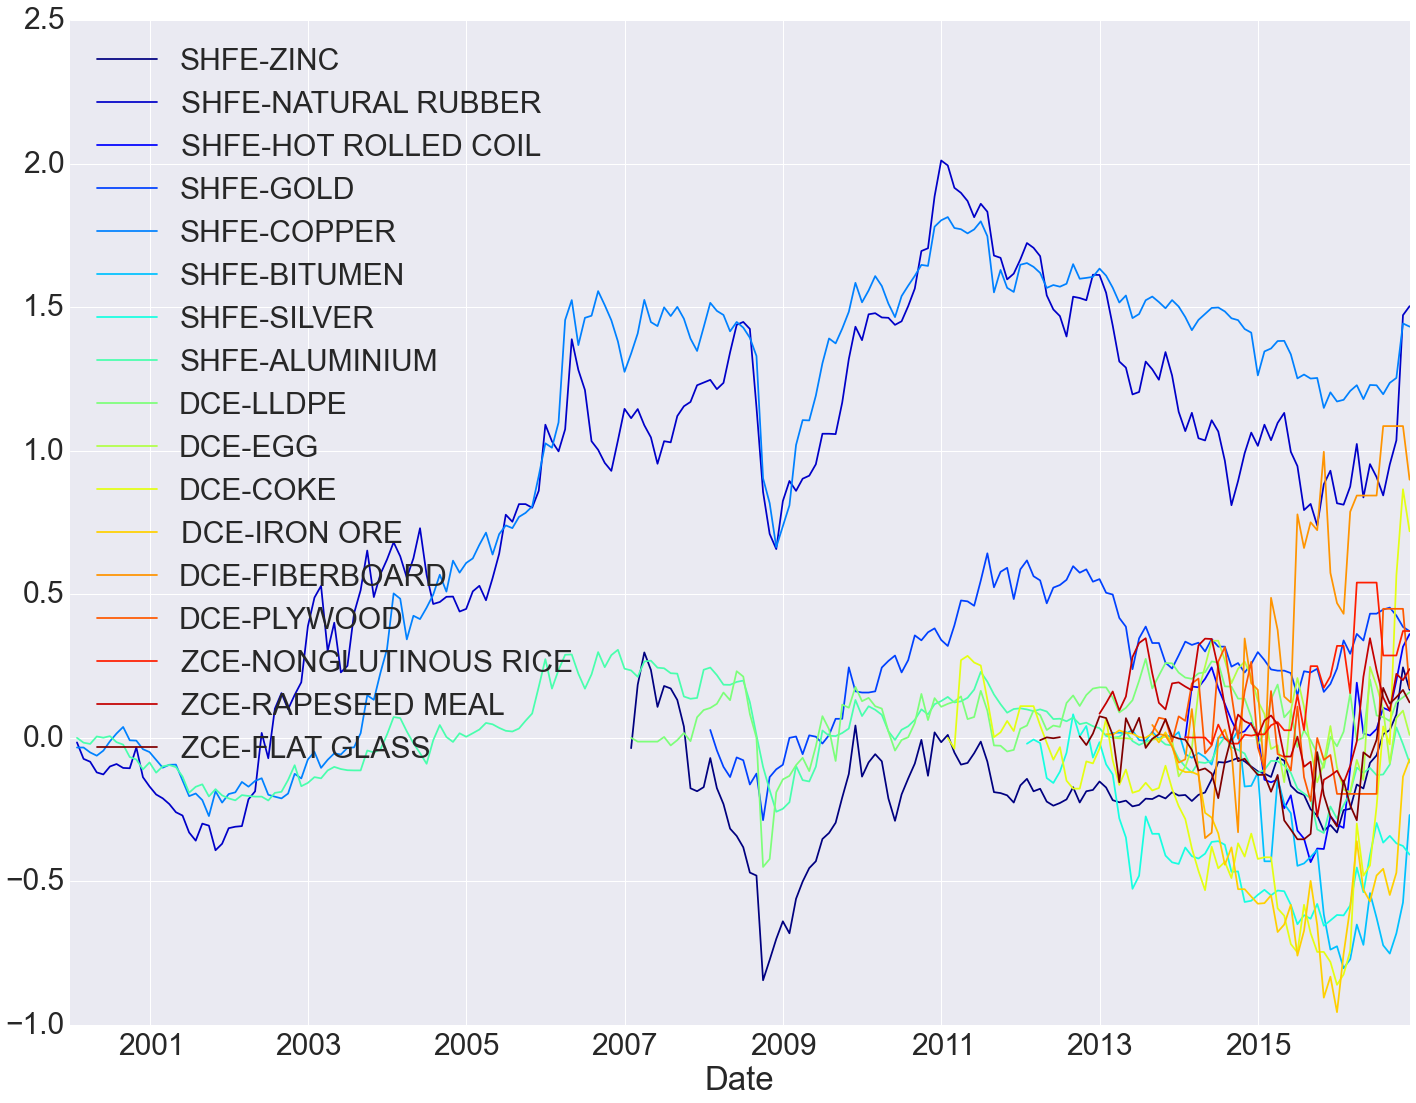

In [13]:
china['2000':'2016'].resample(rule='m',how='last').pct_change().cumsum().plot(colormap='jet')

In [14]:
china_mon=china['2000':'2016'].resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [15]:
def tsmom(data,months):
    vol=pd.rolling_std(data.pct_change(),12)*math.sqrt(12)
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  from IPython.kernel.zmq import kernelapp as app


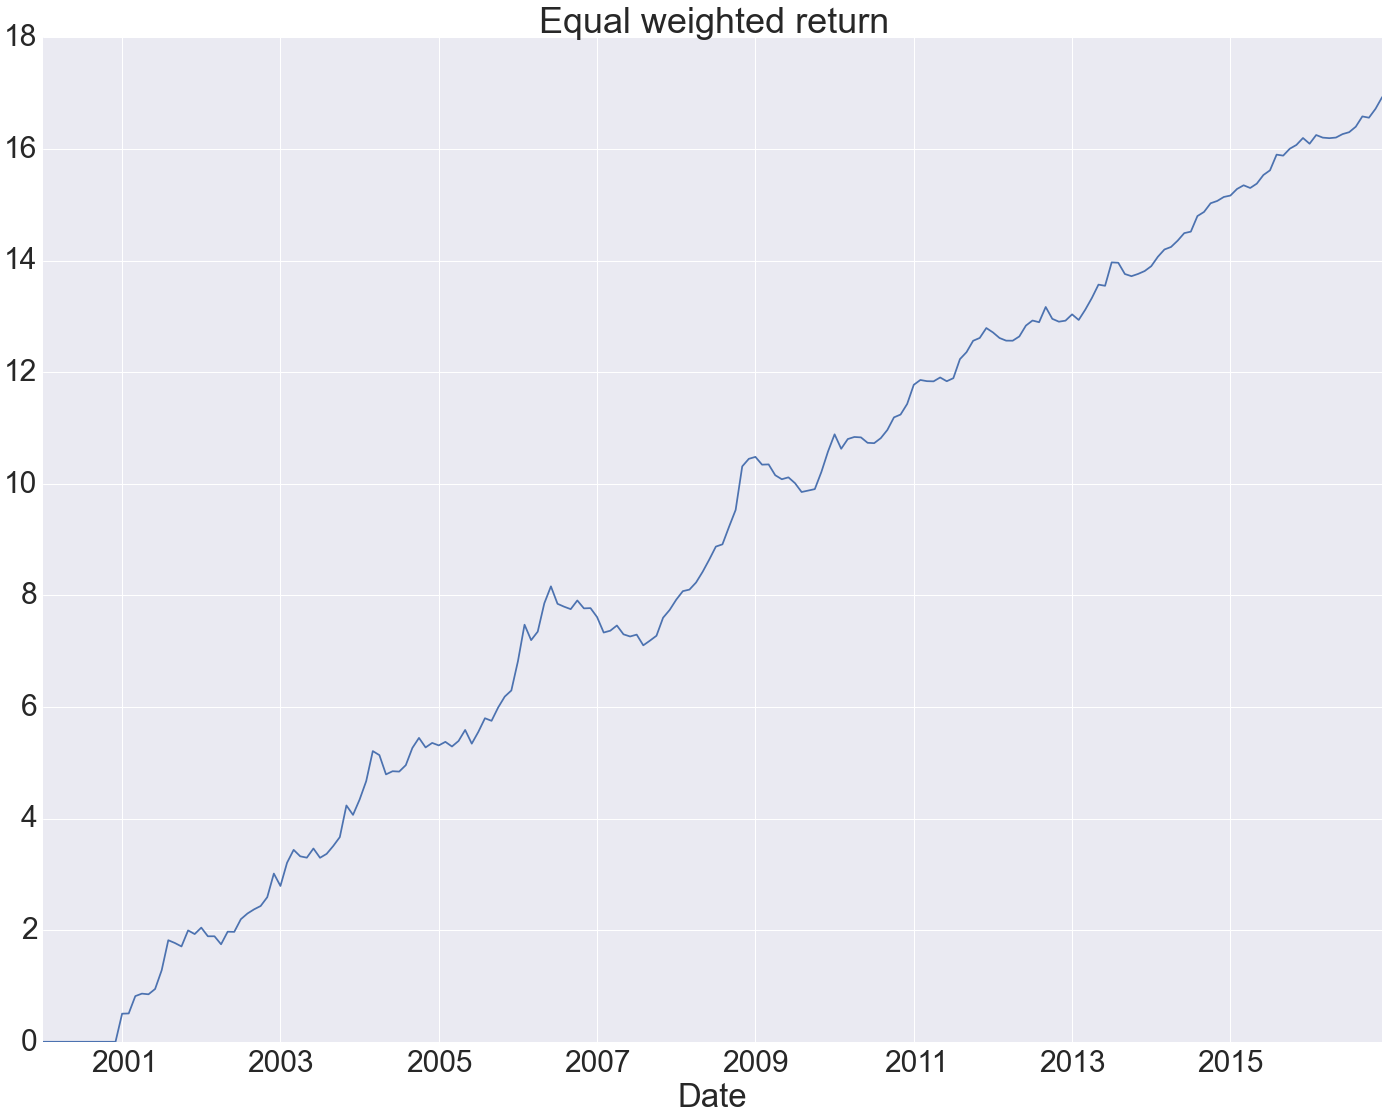

In [16]:
pos=tsmom(china_mon,12)
pnl=calc_pnl(pos,china_mon)
sr=calc_Sharpe(pnl)
ew_portfolio_pnl(pnl)[:'2016'].cumsum().plot(title='Equal weighted return')

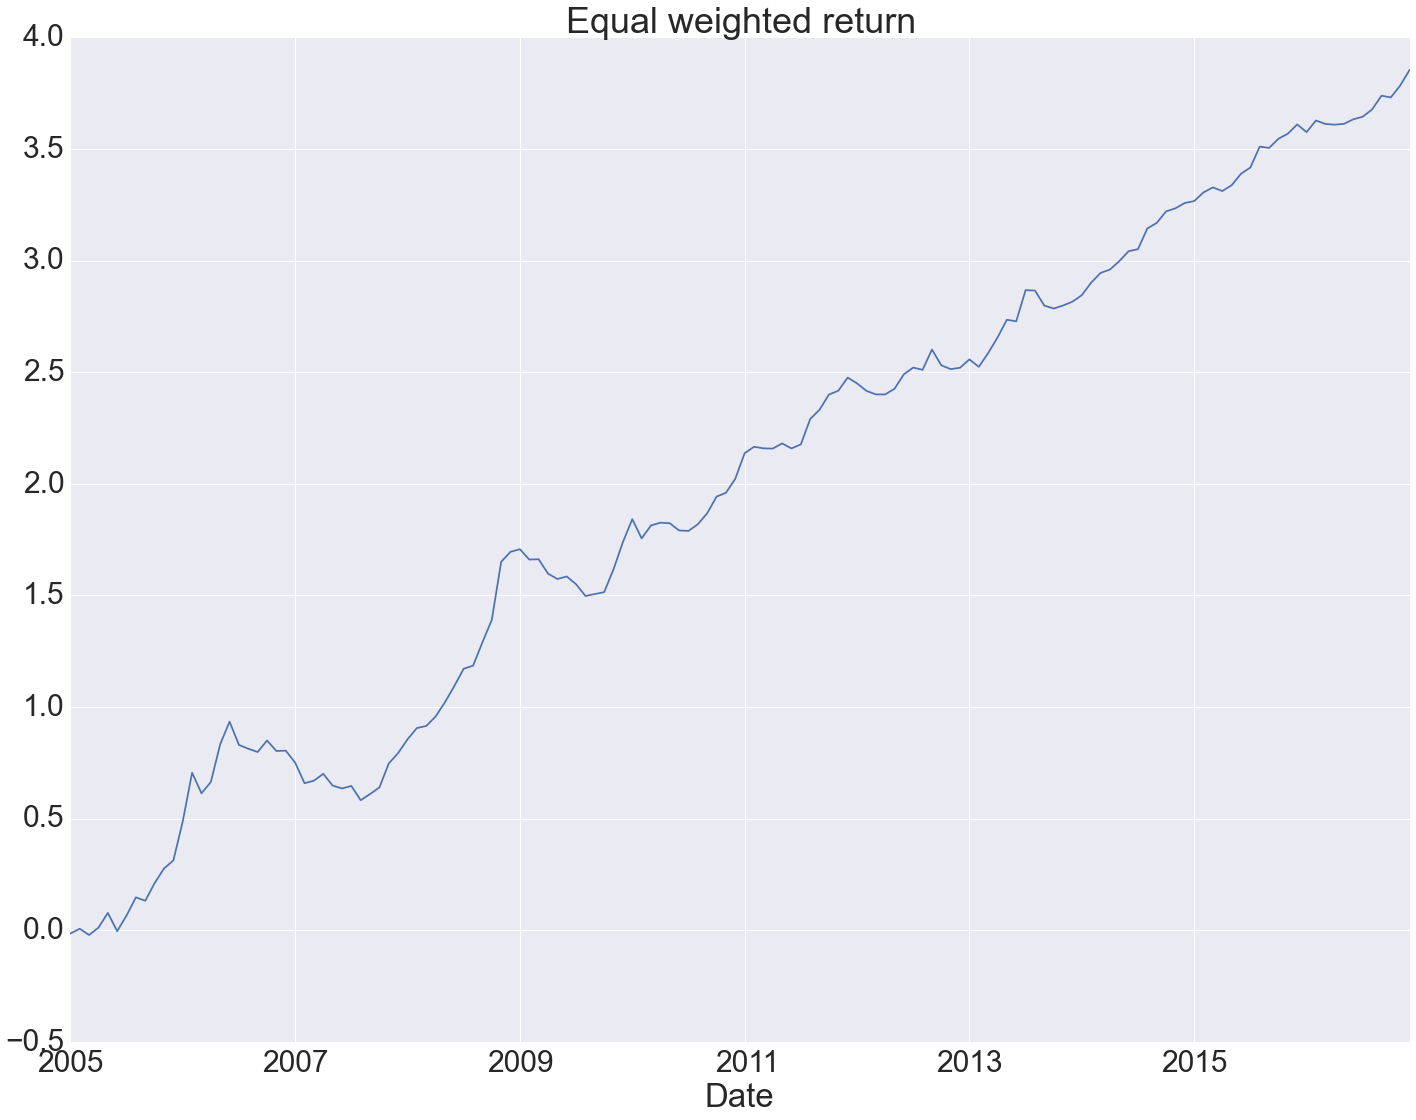

In [17]:
(ew_portfolio_pnl(pnl)*.333)['2005':'2016'].cumsum().plot(title='Equal weighted return')

In [18]:
sr

SHFE-ZINC                0.985547
SHFE-NATURAL RUBBER      1.129143
SHFE-HOT ROLLED COIL     1.422719
SHFE-GOLD                0.757237
SHFE-COPPER              1.103435
SHFE-BITUMEN             0.930354
SHFE-SILVER              0.824156
SHFE-ALUMINIUM           0.985307
DCE-LLDPE                0.926908
DCE-EGG                 -0.265862
DCE-COKE                 1.264767
DCE-IRON ORE             1.451599
DCE-FIBERBOARD           0.254480
DCE-PLYWOOD              1.194212
ZCE-NONGLUTINOUS RICE    1.125863
ZCE-RAPESEED MEAL        1.159721
ZCE-FLAT GLASS           0.608738
dtype: float64

List of things to do:
* Clean up data, can we get someone to do this?
* think about trading more frequently.
* Operations.  Think about who executes.  
* For modelling purposes you can get better and lag the price achived by one day.  Generate signal and then delay entry point by a day
* Portfolio construction.  Do we just use 1/N (in vol space)?  How do we scale the portfolio to achive our long term volatility.  We just need to define the process to scale and how often to we change
* Store all data in MongoDB via Artic

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


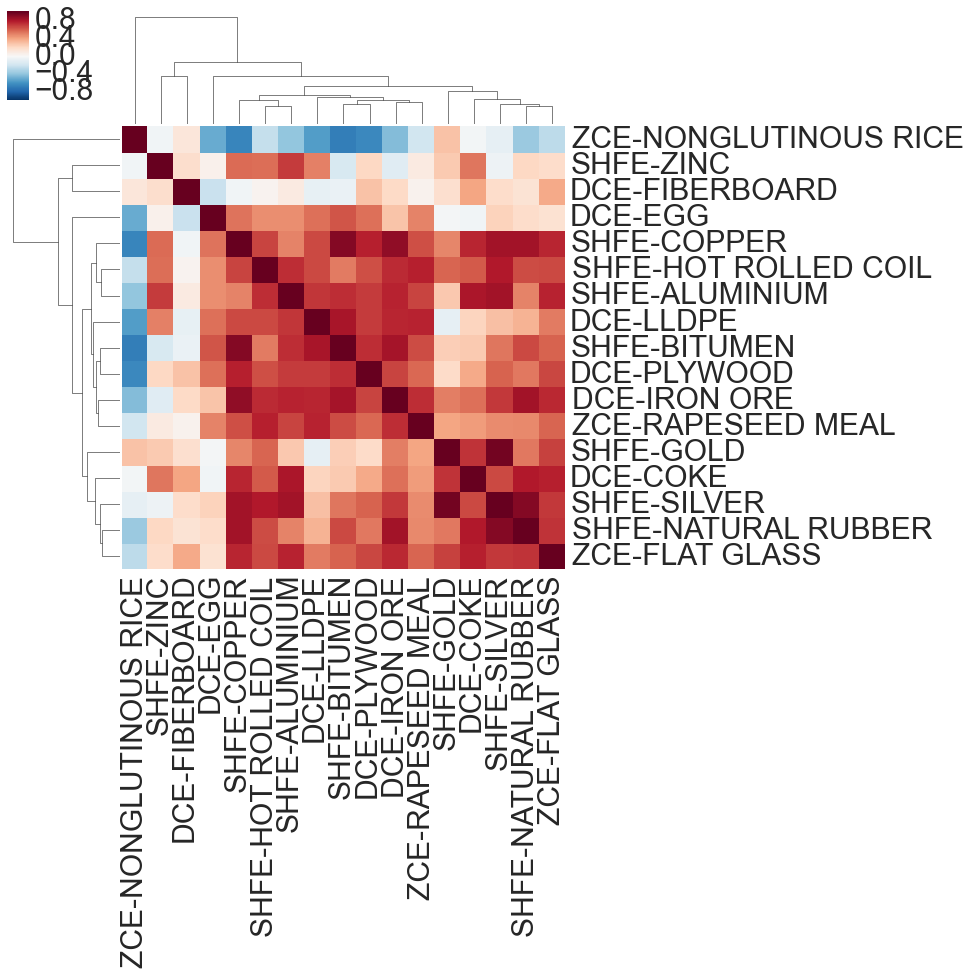

In [20]:
sns.clustermap(china_mon.corr())